# Forecasting
## Predict what's happening in the future. Anticipating.
- Strategically, being able to anticipate the results of your actions allows you to identify the efficient strategies to adapt.
- Operationally, detecting events that will happen, before they will happen, allows the operations to be more efficient as well.
- be aware of the Post hoc, Ergo Propter hoc fallacy. It's not because event B happens after event A, that A causes B. Post hoc, Ergo Propter hoc fallacies are very dangerous when looking for actionable insights in practice. 

We could think that we should prevent this behavior. Not necessarily, because it may be a symptom and not a cause. In this example, if this forms is for instance a contract designation document, it's a symptom. It's irrelevant to try to prevent it. But we should, instead, see it as a signal to act.
Let's call those customers, proactively, to understand how we could serve them better.

- From prediction, are we targeting marketing, to sales and product management or predictive maintenance.
- - 1. how to predict which observations (custumers, employees, etc.) are more likely to behave in a certain way in the future. -> Classical Classification to predict events.
- - 2. when is a certain event likely to happen precisely? -> Survival Analysis.
- - 3. How to model seasonal effects. For instance, when we have sales volumes that are varying from one season to the other.  

# 1. Which custumers, employees, etc. are more likely to behave in a certain way in the future? Although we don't check when.

- Thanks to the classification regression techniques, we have built a model relating causes and outcomes based on past data.
- We can therefore plug in to this model new data that was not used to estimate the parameters of the model.
- That is what is called Out-Of-Sample-Data, and we can consequently predict the expected outcomes for those new observations thanks to the original model.

Credit Scoring from before, use the estimated model to predict new data "Out-Of-Sample", not previously seen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df_new = pd.read_csv(
    "../../DATA/Credit_4.csv"
)

df_new = pd.DataFrame(df_new)

print(
    f"Dataset:\n{df_new.head(5)}\n"
)

Dataset:
   Income  Rating  Cards  Age  Education  Gender Student Married  \
0  21.786     355      1   50         17    Male      No     Yes   
1  31.335     289      3   38          7  Female      No      No   
2  59.855     365      1   46         13  Female      No     Yes   
3  44.061     352      1   79         11    Male      No     Yes   
4  82.706     536      2   64         13  Female      No     Yes   

          Ethnicity  Balance  
0         Caucasian      580  
1         Caucasian      172  
2         Caucasian      295  
3  African American      414  
4             Asian      905  



In [12]:
df_new.describe()

,Income,Rating,Cards,Age,Education,Balance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,48.712360,375.410000,2.750000,57.720000,13.620000,572.000000
std,39.071113,164.841834,1.416889,17.271498,3.280737,435.465199
min,10.735000,112.000000,1.000000,23.000000,6.000000,0.000000
25%,21.001750,282.000000,2.000000,44.000000,11.000000,191.000000
50%,33.275000,363.000000,3.000000,57.500000,14.000000,579.000000
75%,61.797000,448.000000,3.000000,71.000000,16.000000,890.000000
max,182.728000,982.000000,9.000000,98.000000,19.000000,1999.000000


##### Prepare Data

In [14]:
X_scaled = pd.get_dummies(df_new, drop_first=True)

X_new, y_new = X_scaled[["Income","Cards", "Age", "Education", "Balance", "Gender_Female","Student_Yes", "Married_Yes", "Ethnicity_Asian", "Ethnicity_Caucasian"]].values, X_scaled['Rating'].values
print('Features:',X_new[:3], '\nLabels:', y_new[:3], sep='\n')


Features:
[[ 21.786   1.     50.     17.    580.      0.      0.      1.      0.
    1.   ]
 [ 31.335   3.     38.      7.    172.      1.      0.      0.      0.
    1.   ]
 [ 59.855   1.     46.     13.    295.      1.      0.      1.      0.
    1.   ]]

Labels:
[355 289 365]


##### Load previous model

In [16]:
import joblib
import numpy as np


filename = "../models/Credit_Score_Regression_sklearn.pkl"

#  Load the model from the file
model = joblib.load(filename)

/home/mark/anaconda/envs/rin/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.23.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Correlation between Fitted Values and Actual Values:
0.9880970401112152

MSE: 639.7179994309369
RMSE: 25.29264714162867
R2: 0.976219635842094


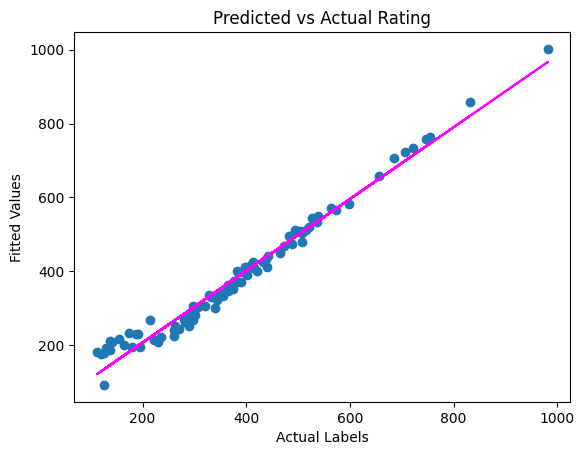

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
# Get predictions
predictions = model.predict(X_new)

# Show Correlation Between Fitted Values and Actual values:
print(
    f"Correlation between Fitted Values and Actual Values:\n{np.corrcoef(predictions, y_new)[0,1]}\n"
)


# Display metrics
mse = mean_squared_error(y_new, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_new, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_new, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Fitted Values')
plt.title('Predicted vs Actual Rating')
z = np.polyfit(y_new, predictions, 1)
p = np.poly1d(z)
plt.plot(y_new,p(y_new), color='magenta')
plt.show()

Now what could we do with this in practice?
Many things actually. We can identify the applicants who do not have credit score yet but that should be acquired as clients. Or the opposite: avoid including bad credits. You see that once we have estimated the model, we can predict the outcome of interest for any additional observation as long as we have the explanatory variables used in the model.

# HR Analytics - Employees Attrition Classification

- The prediction needs to be seen as a probability that those employees will leave the company in the future.

- We could, for instance, prioritize our actions and if we do so we need to keep in mind that the probability informs us on the employees that are most likely to leave.
- But we also need to add to the analysis information about how much we want to retain those employees.

Attrain VS Performance

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df_new = pd.read_csv(
    "../DATA/HR_4.csv"
)

df_new = pd.DataFrame(df_new)

print(
    f"Dataset:\n{df_new.head(5)}\n"
)

Dataset:
      S   LPE  NP  ANH  TIC  Newborn
0  0.86  0.69   4  105    4        1
1  0.52  0.98   4  209    2        0
2  0.84  0.60   5  207    2        0
3  0.60  0.65   3  143    2        1
4  0.85  0.57   3  227    2        0



In [52]:
df_new.columns =["Satisfaction","Evaluation","# Projects","# Hours_Year","Time","Newborn"]
df_new.describe()

,Satisfaction,Evaluation,# Projects,# Hours_Year,Time,Newborn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.662640,0.719340,3.781000,200.166000,3.10300,0.197000
std,0.224228,0.164401,0.985906,46.054831,1.04474,0.397931
min,0.120000,0.360000,2.000000,96.000000,2.00000,0.000000
25%,0.530000,0.590000,3.000000,160.000000,2.00000,0.000000
50%,0.680000,0.720000,4.000000,201.000000,3.00000,0.000000
75%,0.850000,0.860000,4.000000,241.000000,4.00000,0.000000
max,1.000000,1.000000,6.000000,287.000000,6.00000,1.000000


In [53]:
# Separate features and labels
features = df_new.columns

X_new = df_new[features].values

In [32]:
import joblib
import numpy as np

filename = "../models/Churn_Prediction_Binary.pkl"

#  Load the model from the file
model = joblib.load(filename)

/home/mark/anaconda/envs/rin/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [33]:
def draw_confusion_matrix(cm):
    
    print(
        f"             ACTUAL    \n         0         1\n    0    {cm[0][0]}     {cm[0][1]}\n    1     {cm[1][0]}     {cm[1][1]}"
    )

    print(
        f"Precision_0 -> Correctly classified with label 0: {cm[0][0]/(cm[0][0]+cm[1][1])}"
    )

    print(
        f"Precision_1 -> Correctly classified with label 1: {cm[1][1]/(cm[0][0]+cm[1][1])}"
    )

    print(
        f"Accuracy -> Overall percentage of correctly classified: {(cm[0][0]+cm[1][1])/sum(sum(cm))}"
    )

Text(0.1, 0.455, 'ACT QUICK')

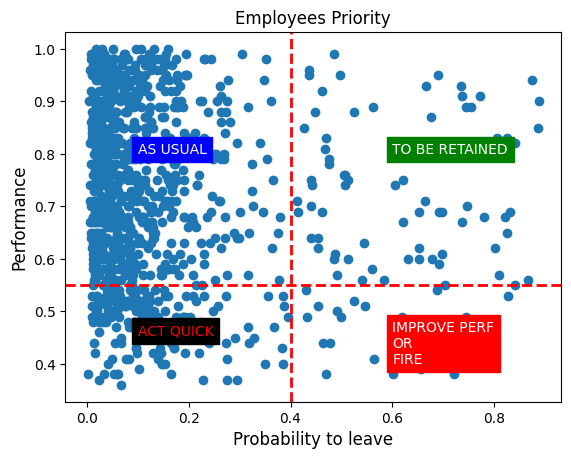

In [77]:
probas = model.predict_proba(X_new)[:,1]

insights_df = pd.DataFrame(probas, columns=["Prob_to_leave"])
insights_df["Performance"] = df_new["Evaluation"]
insights_df.head(2)

plt.scatter(x = "Prob_to_leave", y="Performance", data= insights_df)

plt.xlabel("Probability to leave", size=12)
plt.ylabel("Performance", size=12)
plt.title("Employees Priority", size=12)

# AS USUAL
plt.axhline(y=0.55, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=0.4, color = 'red', linestyle='dashed', linewidth = 2)

plt.text(0.1, 0.8, "AS USUAL",  c = "white", backgroundcolor = "blue")
plt.text(0.6, 0.8, "TO BE RETAINED", c = "white", backgroundcolor = "green")
plt.text(0.6, 0.4, "IMPROVE PERF\nOR\nFIRE",  c = "white", backgroundcolor = "red")
plt.text(0.1, 0.455, "ACT QUICK",  c = "red", backgroundcolor = "black")


- **Improve/Fire** We first have the employees that are underperforming. We should improve their performance.
- **As usual** Then we have those who are performing okay, and that we should retain.
- **To be retained** Among those we want to retain, some employees are not likely to leave soon. So we should manage them as usual.
- **Act Quickly, good perf and high prob to leave** And then, on the short run, we should focus on those with a good performance and a high probability to leave, to assess the visual priorities for each employee in a quantitative way.

Priority Score:
- We could for instance, multiply the probability to leave with the performance.
- we then have a priority score since the result of this product will be high for the employees that we want to act on quickly, and low for the other ones.
- High Values we need to ACT.

In [82]:
insights_df["Priority_score"] = round(insights_df["Prob_to_leave"] * insights_df["Performance"],3)
insights_df.sort_values("Priority_score", ascending=False).head(5)

,Prob_to_leave,Performance,Priority_score
927,0.874727,0.94,0.822
587,0.887601,0.90,0.799
476,0.886005,0.85,0.753
683,0.772466,0.91,0.703
234,0.840148,0.82,0.689


### We could call for a meeting the first 2 employees.

## Thanks to this approach we can identify Quick Wins.
- Clients about to leave who decide to stay.
- This type of analysis is also used a lot to prioritize marketing actions such as retention or in the case of propensity- to-buy or cross-sell and up-sell modeling.

In such a context the probability interest would be the probability that customer buys the product - which can be estimated thanks to a similar model as what we've seen in the HR case. And the equivalent of the performance variable could be the expected margin, for instance, of this product

### But using a classification technique as a prediction tool has a major flaw. We may know whether an event is likely to happen in the future, but we don't know when, exactly.

-------------------------------------------------------------------------------------------------------------------------------

# 2. Survival Analysis - When will customers leave, price increase, device break, etc... happen?

- We now have identified what were the drivers of attrition and who was likely to leave, but we don't know when exactly.
- How long before a customer churns?
- How long before a certain mechanical element breaks down?
- - This question is actionable in practice. Because if you can anticipate failures you can allocate your maintenance resources more efficiently and reduce the downtime of your processes by replacing the broken pieces proactively.

### How long before a certain mechanical element breaks down?
#### This question is actionable in practice. Because if you can anticipate failures you can allocate your maintenance resources more efficiently and reduce the downtime of your processes by replacing the broken pieces proactively.
- In this case, Linear Regression may not be the best solution.

 we have only one or two variables that have a significant effect. But actually, this is neither reliable nor accurate! Because there are many elements that didn't break yet and we don't know how long they will still last. So for the 60% of the observations that didn't break until now, we cannot really say when it will happen. And since, with the standard linear regression, we cannot estimate what's driving an event that didn't happen yet we cannot say anything about those, and we cannot only include these elements that broke either, because we would then have a biased model.

In [84]:
#### PREDICTIVE MAINTENANCE ####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv(
    "../DATA/MNT.csv"
)

df = pd.DataFrame(df)

print(
    f"Dataset:\n{df.head(5)}\n"
)

Dataset:
   lifetime  broken  pressureInd  moistureInd  temperatureInd   team  \
0        56       0    92.178854   104.230204       96.517159  TeamA   
1        81       1    72.075938   103.065701       87.271062  TeamC   
2        60       0    96.272254    77.801376      112.196170  TeamA   
3        86       1    94.406461   108.493608       72.025374  TeamC   
4        34       0    97.752899    99.413492      103.756271  TeamB   

    provider  
0  Provider4  
1  Provider4  
2  Provider1  
3  Provider2  
4  Provider1  



- lifetime: How long in weeks has it been used.
- broken: Is it broken?
- pressureInd: Pressure Index
- moistureInd: Moisture Index
- temperatureInd: Temperature Index
- team: Team in charge of maintenance.
- provider: Provider of supplied piece.

In [86]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.195000,0.397000,98.599338,99.376723,100.628541
std,26.472737,0.489521,19.964052,9.988726,19.633060
min,1.000000,0.000000,33.481917,58.547301,42.279598
25%,34.000000,0.000000,85.558076,92.771764,87.676913
50%,60.000000,0.000000,97.216997,99.433959,100.592277
75%,80.000000,1.000000,112.253190,106.120762,113.662885
max,93.000000,1.000000,173.282541,128.595038,172.544140


- 40% of pieces are broken.

We have to provide the lifetime and whether the element broke or not for each observation as the dependent variable.

In [195]:
from sklearn.model_selection import train_test_split
# Separate features and labels
features = ["pressureInd", "moistureInd", "temperatureInd","team_TeamB" ,"team_TeamC" ,"provider_Provider2" ,"provider_Provider3", "provider_Provider4"]
label = ["broken"]
X_dummies = pd.get_dummies(df, drop_first=True)
X = X_dummies[features].values

y_time = pd.DataFrame(df["lifetime"].values,df["broken"].values.astype(bool))

y_time_list = []
for it,row in enumerate(y_time.iterrows()):
    y_time_list.append((bool(row[0]),row[1].values[0]))
y_time_list

y_time_array = np.empty(len(y_time_list), dtype=[('Broken', '?'), ('Lifetime', '<f8')])
y_time_array[:] = y_time_list


##  Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_time_array, test_size=0.30, random_state=0)

# print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


## The Right-Censored Problem

- So for the 60% of the observations that didn't break until now, we cannot really say when it will happen. And since, with the standard linear regression, we cannot estimate what's driving an event that didn't happen yet we cannot say anything about those, and we cannot only include these elements that broke either, because we would then have a biased model.
- We know who is "alive" until now, but even if we suppose that on the long run everybody dies, we don't know when it will happen for those who are alive today.

### We need a model that can estimate what's driving the probability to die or to break or to default, even for the observations that didn't die yet.

In [196]:
## A LINEAR REGRESSION WOULD NOT BE AN ACCURATE MODEL, SINCE IT CAN NOT TELL US WHEN ARE THINGS GOING TO HAPPEN.

## SO WE CHOOSE A SURVIVAL MODEL ANALYSIS:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

set_config(display="text")  # displays text representation of estimators

survival_model = CoxPHSurvivalAnalysis()
survival_model.fit(X_train,y_train)

CoxPHSurvivalAnalysis()

As usual we identify the significant variables by looking at the p values. The smaller the better. Here we emphasize in bold the variables that have a p-value smaller than 0.05.

In [197]:
## Coefficients, one for each variable, where each value corresponds to the log hazard ratio.
pd.Series(survival_model.coef_, index=features)

pressureInd            0.001112
moistureInd           -0.007835
temperatureInd         0.014918
team_TeamB             0.032049
team_TeamC            39.811508
provider_Provider2   -79.566214
provider_Provider3    61.778744
provider_Provider4   -59.510692
dtype: float64

moisture index, the temperature index, whether the element is taken care of by Team C, and all the provider variables

Positive means that the factor increases the chance of survival, and negative means the opposite

We see that moisture has, an average, a positive effect on the lifetime, and that, everything else being equal, the units provided by providers two and four have better expected lifetime than the others.

- Now that doesn't mean that we should only work with providers two and four.
- They may be more expensive or they may provide elements that are used in conditions that are less demanding.
- We should investigate. Same with negative effects.

### Predicting

The predict function allows to use the result of the survival model estimations for predicting the expected median "time to death" of each individual element. Hence, for each observation, we can compare this expected time to death with the current lifetime and compute the expected remaining lifetime, which is just the difference between the actual lifetime and the expected time to death.

- We NEED to remove the ones that broke already.

In [217]:
from sksurv.metrics import concordance_index_censored

prediction = survival_model.predict(X_test)
result = concordance_index_censored(y_test["Broken"], y_test["Lifetime"], prediction)
print(
    f"Correlation between prediction and actual values:\n{result[0]}")


insights_df = pd.DataFrame(predictions)

Correlation between prediction and actual values:
0.9994424310008364


#### Evaluation
- Use Out Of Sample data.
- Train only until a time in past, use the rest to test.

### Conclusions
- It can consequently be used to prioritize our maintenance actions. 
- And replace the pieces that will break soon, before it happens, by anticipating failures, acting proactively, and therefore decreasing the downtime of the process, we benefit from more efficient resource allocation.
- We avoid unnecessary tasks. Here maintenance of pieces that still have a long expected lifetime

# 3. Predict all Series Analysis

- As a chocolate bar manufacturer, it's important to be able to forecast the sales accurately in order to allocate the right quantities of bars in store proactively. On the one hand, should you have too much chocolate in store, your inventory management won't be efficient. You will waste a lot of money by placing products on the shelves, that will not be purchased.
- If you underestimate the demand it may even be worse: your turnover will be impacted negatively because you failed to sell products you could have sold otherwise.

- Sales of chocolate bars typically vary over time.

In [238]:
#### PREDICTIVE MAINTENANCE ####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv(
    "../DATA/Choc.csv"
)

df = pd.DataFrame(df)
df.head(2)

,time,sales,year,month
0,1,135.481871,2000,01_January
1,2,281.758729,2000,02_February


In [230]:
df.describe()

,time,sales,year
count,120.000000,120.000000,120.000000
mean,60.500000,216.699587,2004.500000
std,34.785054,210.227811,2.884324
min,1.000000,36.854401,2000.000000
25%,30.750000,82.883337,2002.000000
50%,60.500000,163.041470,2004.500000
75%,90.250000,221.328853,2007.000000
max,120.000000,1068.622183,2009.000000


(0.0, 1282.346620089864)

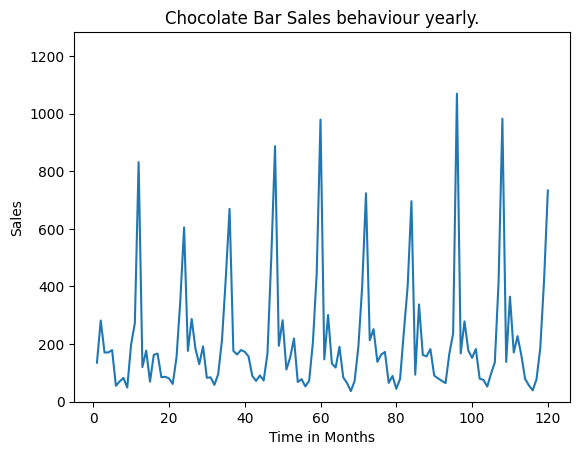

In [240]:
plt.plot(df["time"], df["sales"])
plt.title("Chocolate Bar Sales behaviour yearly.")
plt.xlabel("Time in Months")
plt.ylabel("Sales")
plt.ylim([0, df["sales"].max()*1.2])

- We see that we have peaks and valleys. The sales can go up to one thousand units in one month and go very low during another one. But we also see that there's some kind of regularity in the time service.

Let's test it by using the month of the year as an exploratory variable in a linear regression, we do a good job at modeling the sales.

In [243]:
import statsmodels.api as sm


## Ordinary Least Square Linear Regression:
model = sm.OLS.from_formula("sales ~ month", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     132.9
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.87e-57
Time:                        14:45:43   Log-Likelihood:                -650.98
No. Observations:                 120   AIC:                             1326.
Df Residuals:                     108   BIC:                             1359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               156.2110     18.306      8.533      0.000     119.925     192.497
month[T.02_February]    116.3766     25.889      4.495      0.000      65.060     167.693
month[T.03_March]        -6.5590     25.889     -0.253      0.800     -57.876      44.758
month[T.04_April]         4.8465     25.889      0.187      0.852     -46.470      56.163
month[T.05_May]          24.2454     25.889      0.937      0.351     -27.071      75.562
month[T.06_June]        -78.0337     25.889     -3.014      0.003    -129.350     -26.717
month[T.07_July]        -80.2622     25.889     -3.100      0.002    -131.579     -28.945
month[T.08_August]      -94.9413     25.889     -3.667      0.000    -146.258     -43.625
month[T.09_September]   -81.9211     25.889     -3.164      0.002    -133.238     -30.604
month[T.10_October]      30.1851     25.889      1.166      0.246     -21.132      81.502
month[T.11_November]    230.8937     25.889      8.919      0.000     179.577     282.210
month[T.12_December]    661.0336     25.889     25.533      0.000     609.717     712.350
==============================================================================
Omnibus:                       24.394   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.169
Skew:                           0.211   Prob(JB):                     3.04e-37
Kurtosis:                       8.784   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that December, November and February have on average a positive effect on sales. A sign of the estimate is indeed positive in those cases and also the months June to September report a decrease in sales on average.

we could for instance use box plots as we do here to report the distribution of sales per month. A box plot allows for different cases here for different months to report the distribution of a certain value here to sales.

<AxesSubplot: title={'center': 'sales'}, xlabel='month'>

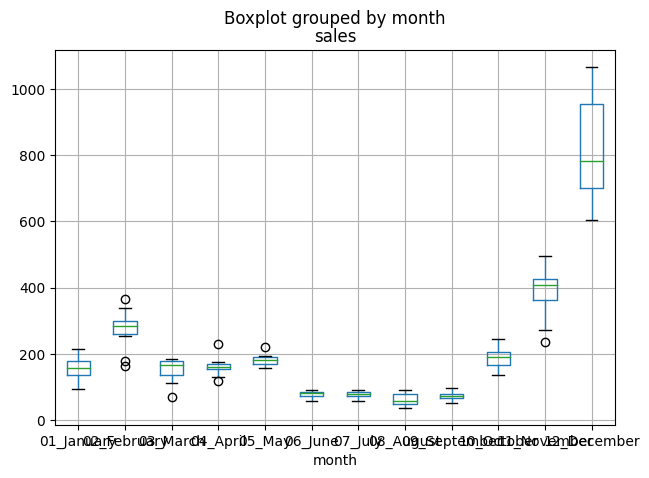

In [253]:
df.boxplot(column="sales", by="month", figsize=(7,5))

The box itself contains 50% of the values of the specific month and the bar within the box reports the median value.

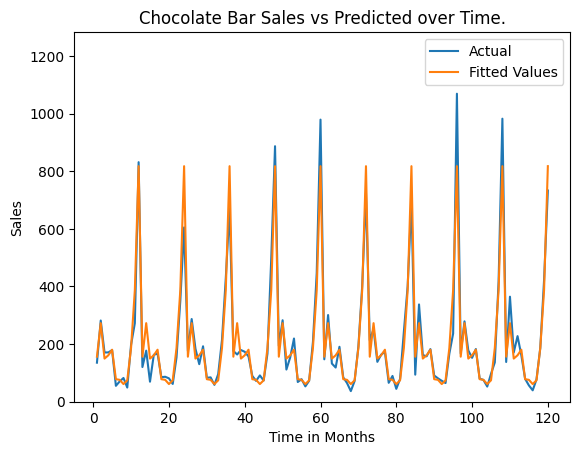

In [261]:
plt.plot(df["time"], df["sales"], label = "Actual")
plt.title("Chocolate Bar Sales vs Predicted over Time.")
plt.xlabel("Time in Months")
plt.ylabel("Sales")
plt.ylim([0, df["sales"].max()*1.2])

plt.plot(df["time"], result.fittedvalues, label="Fitted Values")
plt.legend()

plt.show()

We see that the fit is indeed very good. We can therefore use the model we have to forecast what will be the sales for each specific month in the future. And while the sales- seen globally- are highly valuable variance given a certain month, is a lot smaller than what we could have expected before.

### CONLCUSION
- We reduced a lot the uncertainty, and we can now use our ability to forcast future sales to allocate the stocks more efficiently. We will maximise our sales, while decreasing our cost of inventory management. 